In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("./data/college_completion.csv")
print("Data dimensions:", df.shape)
print("observations:", df.shape[1])
print("variables included:", df.columns)
print("First few rows:\n", df.head())

Data dimensions: (3798, 63)
observations: 63
variables included: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       '

In [18]:
crosstab = pd.crosstab(df['control'], df['level'])
print("Cross-tabulation of control and level:\n", crosstab)

Cross-tabulation of control and level:
 level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


It seems like many more private not-for-profit controls have a much higher likelihood of being a 4-year level, while public controls are a little more likely to be a 2-year level and private for-profits are almost equally likely to be either level.

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
df['grad_100_value'].hist(bins=30, edgecolor='black')
plt.title("Histogram of Graduation Rate")

plt.subplot(1, 3, 2)
sns.kdeplot(df['grad_100_value'], shade=True)
plt.title("Kernel Density Plot")

plt.subplot(1, 3, 3)
sns.boxplot(y=df['grad_100_value'])
plt.title("Boxplot of Graduation Rate")

plt.tight_layout()
plt.show()

print("Statistical description of grad_100_value:\n", df['grad_100_value'].describe())

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/2678721457.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True)


/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/3906400677.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='control', shade=True)


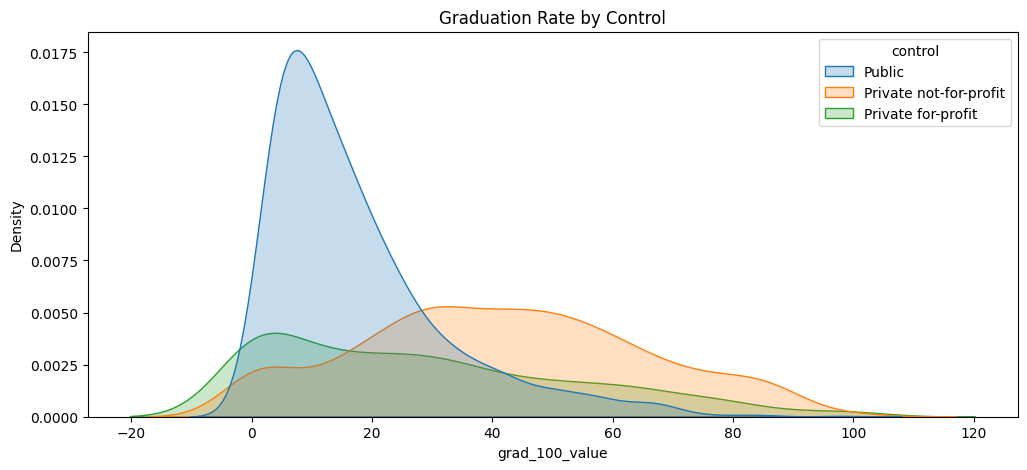

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/3906400677.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='level', shade=True)


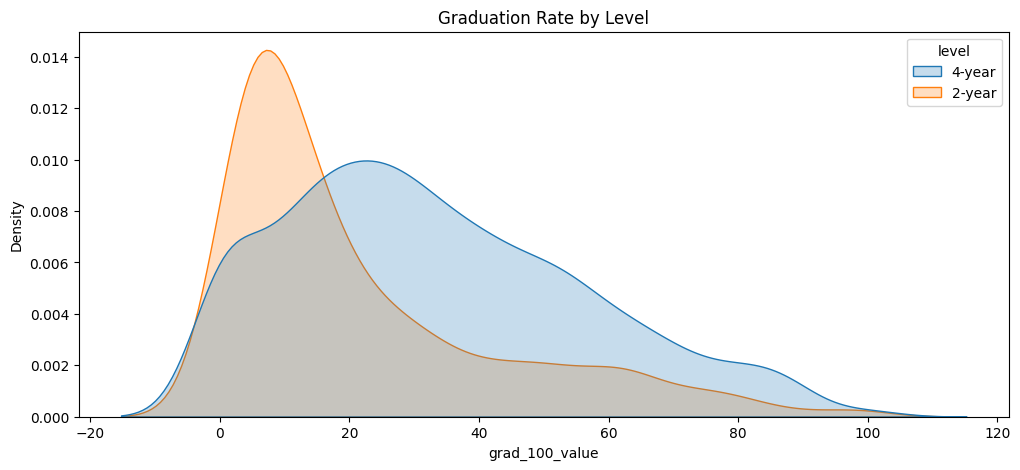

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='control', shade=True)
plt.title("Graduation Rate by Control")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='level', shade=True)
plt.title("Graduation Rate by Level")
plt.show()

From the first graph, we see that public controls have a much lower graduation rate than the other two controls- i.e. a large portion of the graduation rates are between 0-30%. Private for-profit similarly has a shifted graduation rate, with a larger portion around 0-30%- but this shift is not as noticeable as public. Additionally, private not-for-profit as a more normally distributed graduation rate. 
From the second graph, we see that 2 year levels have a much lower graduation rate than 4 year levels, with the majority of the graduation rates being between 0-30%, compared to the- still skewed, but less so- distribution of the 4 year. 

In [ ]:
grouped_stats = df.groupby(['level', 'control'])['grad_100_value'].describe()
print("Grouped statistics for grad_100_value:\n", grouped_stats)

Grouped statistics for grad_100_value:
                                 count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41

The 2 and 4 year private not-for-profits seem to have the best graduation rates, according to their means. 

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/3282794611.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True)


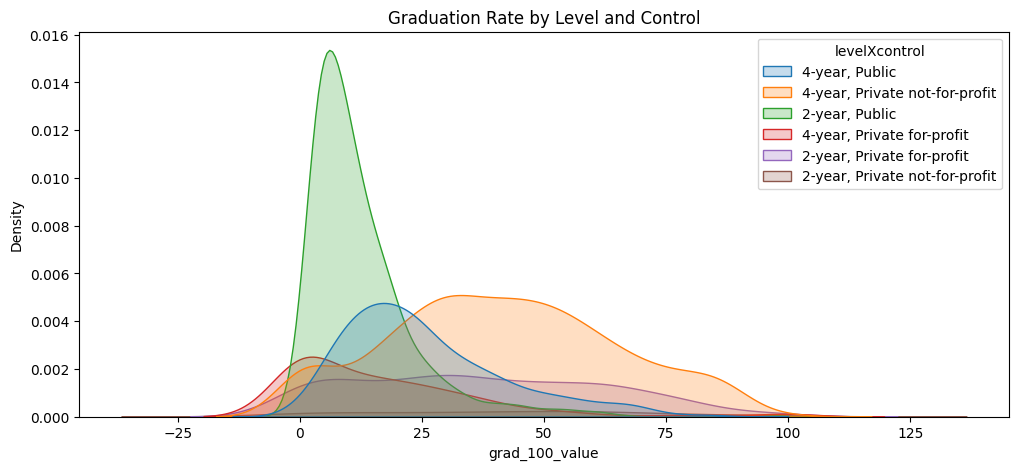

In [ ]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', shade=True)
plt.title("Graduation Rate by Level and Control")
plt.show()

The 2 and 4 year not-for-profits, again, seem to have the most non-skewed (therefore, in this case, highest) graduation rates according to the graph.

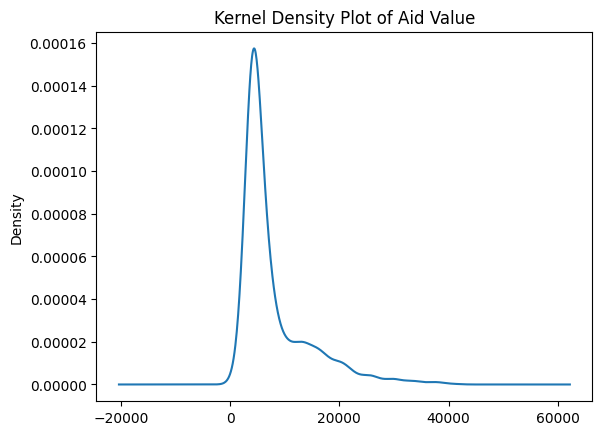

In [ ]:
df['aid_value'].plot(kind='kde', title='Kernel Density Plot of Aid Value')
plt.show()

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/2147684521.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='level', shade=True)


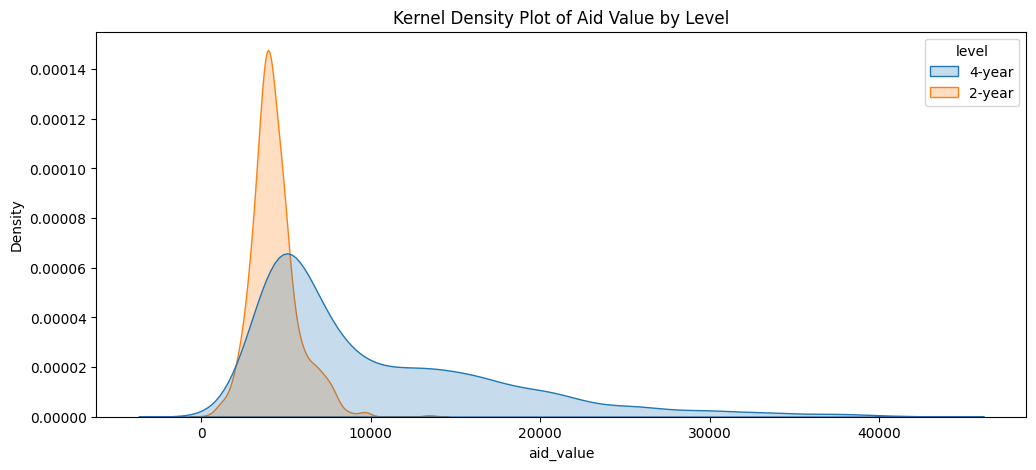

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_33663/2147684521.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='control', shade=True)


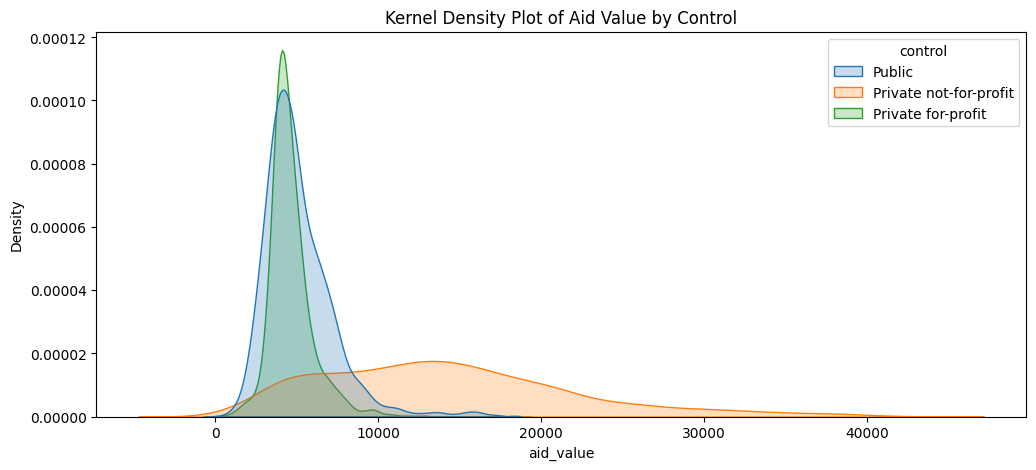

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='aid_value', hue='level', shade=True)
plt.title("Kernel Density Plot of Aid Value by Level")
plt.show()

plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='aid_value', hue='control', shade=True)
plt.title("Kernel Density Plot of Aid Value by Control")
plt.show()

The graph is very skewed right with the majority of the points between 0-10000 and outliers up to 40000. 

In [ ]:
aid_grouped_stats = df.groupby(['level', 'control'])['aid_value'].describe()
print("Grouped statistics for aid_value:\n", aid_grouped_stats)

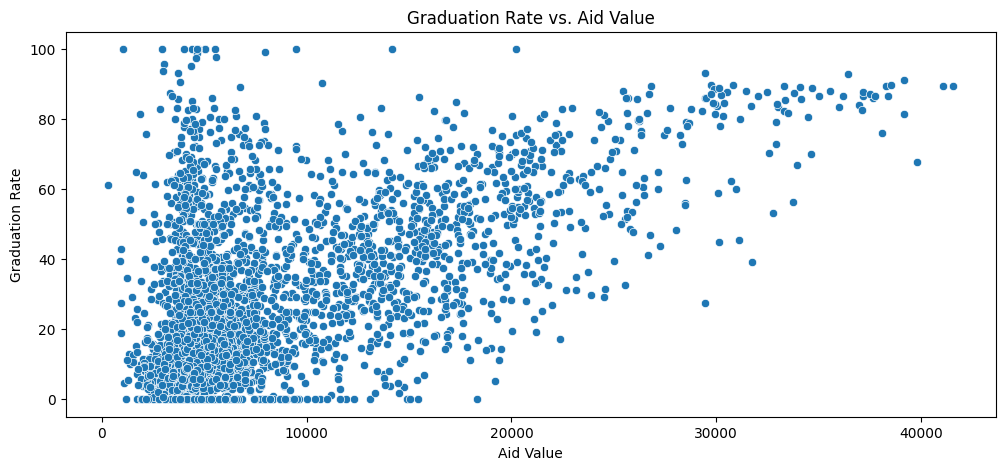

In [ ]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'])
plt.title("Graduation Rate vs. Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.show()

It seems that the higher aid you give, the more likely the graduation rate you will have is going to be higher. 

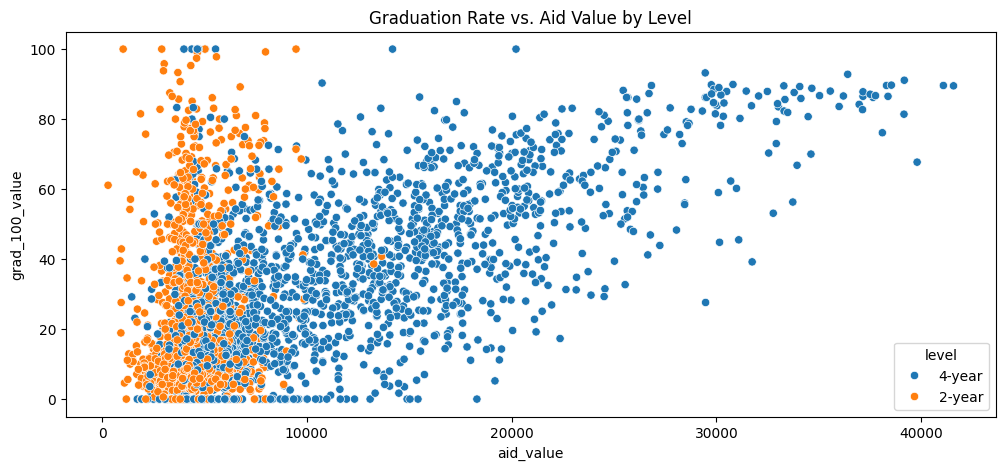

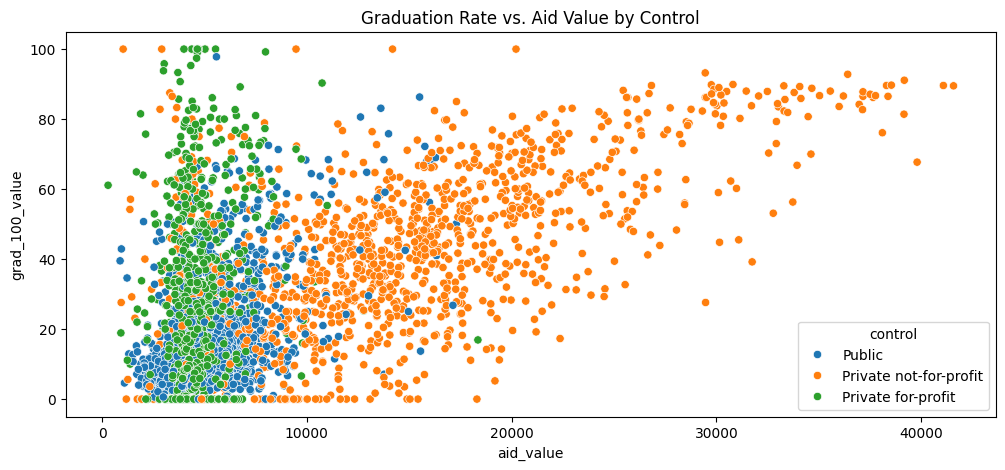

In [ ]:
# Scatterplot grouped by level
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title("Graduation Rate vs. Aid Value by Level")
plt.show()

# Scatterplot grouped by control
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title("Graduation Rate vs. Aid Value by Control")
plt.show()

In the first graph, we see that 4 year institutions that give more aid have the highest graduation rate. In the second graph, we see that private-non-for-profit institutions that give more aid have the highest graduation rates. The others (2 year, public, and private for profit) do not seem to give much aid and their graduation rates, on average, are lower.  